In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import math
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import statistics 


In [3]:
data_train= pd.read_csv("C:/Users/Ami Thakkar/Documents/Disease_Predict/Disease_Training.csv")
data_test= pd.read_csv("C:/Users/Ami Thakkar/Documents/Disease_Predict/Disease_Testing.csv")

In [4]:
data_train.head()
data_train.shape
len(data_train.columns)

133

In [6]:
data_train

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
5,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
6,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
7,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
8,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
9,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [200]:
#df=pd.DataFrame(data_train.duplicated())
#df[0].value_counts()

In [201]:
#data_train.drop_duplicates(keep="first", inplace=True)

In [8]:
data_train.shape

(4920, 133)

In [9]:
data_train.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [205]:
data_train.isnull().sum()

itching                           0
skin_rash                         0
nodal_skin_eruptions              0
continuous_sneezing               0
shivering                         0
chills                            0
joint_pain                        0
stomach_pain                      0
acidity                           0
ulcers_on_tongue                  0
muscle_wasting                    0
vomiting                          0
burning_micturition               0
spotting_ urination               0
fatigue                           0
weight_gain                       0
anxiety                           0
cold_hands_and_feets              0
mood_swings                       0
weight_loss                       0
restlessness                      0
lethargy                          0
patches_in_throat                 0
irregular_sugar_level             0
cough                             0
high_fever                        0
sunken_eyes                       0
breathlessness              

In [11]:
disease_count= data_train['prognosis'].value_counts()
disease_count

Hypoglycemia                               120
Tuberculosis                               120
Chicken pox                                120
Hepatitis B                                120
Osteoarthristis                            120
Hepatitis D                                120
Bronchial Asthma                           120
Psoriasis                                  120
Dengue                                     120
Alcoholic hepatitis                        120
Urinary tract infection                    120
Dimorphic hemmorhoids(piles)               120
Peptic ulcer diseae                        120
GERD                                       120
Acne                                       120
Varicose veins                             120
Typhoid                                    120
Hypothyroidism                             120
hepatitis A                                120
Paralysis (brain hemorrhage)               120
Hyperthyroidism                            120
Impetigo     

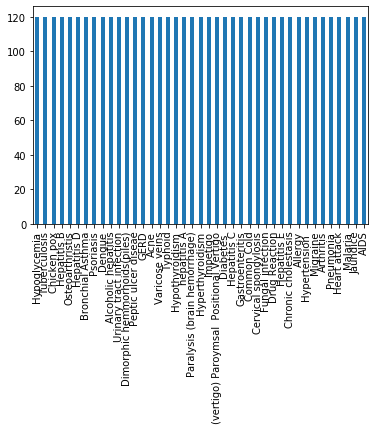

In [12]:
disease_count.plot.bar()

In [150]:
def common_symptom(data,symptoms_dict):
    for i in range(len(data.columns)-1):
        symptom = data.columns[i]
        count= data.iloc[:,i].sum()
        symptoms_dict[symptom] = count
        


In [151]:
symptoms_dict={}
common_symptom(data_train,symptoms_dict)

<BarContainer object of 132 artists>

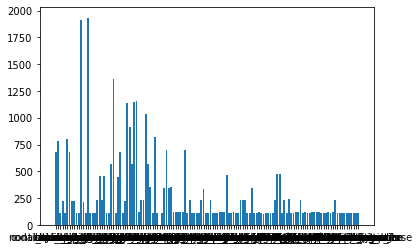

In [34]:
names = list(symptoms_dict.keys())
values = list(symptoms_dict.values())

plt.bar(range(len(symptoms_dict)),values,tick_label=names)

In [35]:
sorted_dict_symptom={} 
  
for i in sorted (symptoms_dict.items(),key=lambda x: x[1],reverse=True) :  
    key=i[0]
    value=i[1]
    sorted_dict_symptom[key]=value
print(sorted_dict_symptom)

{'fatigue': 1932, 'vomiting': 1914, 'high_fever': 1362, 'loss_of_appetite': 1152, 'nausea': 1146, 'headache': 1134, 'abdominal_pain': 1032, 'yellowish_skin': 912, 'yellowing_of_eyes': 816, 'chills': 798, 'skin_rash': 786, 'malaise': 702, 'chest_pain': 696, 'joint_pain': 684, 'itching': 678, 'sweating': 678, 'dark_urine': 570, 'cough': 564, 'diarrhoea': 564, 'irritability': 474, 'muscle_pain': 474, 'excessive_hunger': 462, 'weight_loss': 456, 'lethargy': 456, 'breathlessness': 450, 'mild_fever': 354, 'phlegm': 354, 'swelled_lymph_nodes': 348, 'blurred_and_distorted_vision': 342, 'loss_of_balance': 342, 'dizziness': 336, 'abnormal_menstruation': 240, 'fast_heart_rate': 234, 'muscle_weakness': 234, 'depression': 234, 'red_spots_over_body': 234, 'mood_swings': 228, 'restlessness': 228, 'back_pain': 228, 'constipation': 228, 'neck_pain': 228, 'obesity': 228, 'stiff_neck': 228, 'swelling_joints': 228, 'family_history': 228, 'painful_walking': 228, 'continuous_sneezing': 222, 'stomach_pain': 

<BarContainer object of 5 artists>

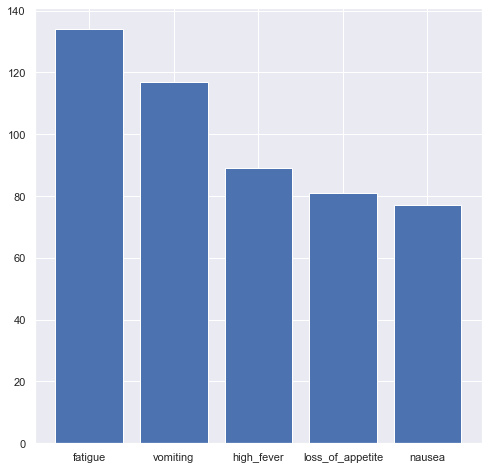

In [230]:
names = list(sorted_dict_symptom.keys())[0:5]
values = list(sorted_dict_symptom.values())[0:5]
plt.bar(range(len(list(sorted_dict_symptom.values())[0:5])),values,tick_label=names)

In [231]:
data_train.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [37]:
data_train["sum_symptom"] = data_train.sum(axis=1)


      itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
0           1          1                     1                    0   
1           0          1                     1                    0   
2           1          0                     1                    0   
3           1          1                     0                    0   
4           1          1                     1                    0   
5           0          1                     1                    0   
6           1          0                     1                    0   
7           1          1                     0                    0   
8           1          1                     1                    0   
9           1          1                     1                    0   
10          0          0                     0                    1   
11          0          0                     0                    0   
12          0          0                     0                    1   
13    

In [153]:
for i in data_train.columns:
    b=data_train.groupby(['prognosis'])['sum_symptom'].apply(lambda g: g.values.mean()).to_dict()
print(b)

KeyError: 'Column not found: sum_symptom'

In [38]:
b_dict={} 
  
for i in sorted (b.items(),key=lambda x: x[1],reverse=True) :  
    key=i[0]
    value=i[1]
    b_dict[key]=value
print(b_dict)

NameError: name 'b' is not defined

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

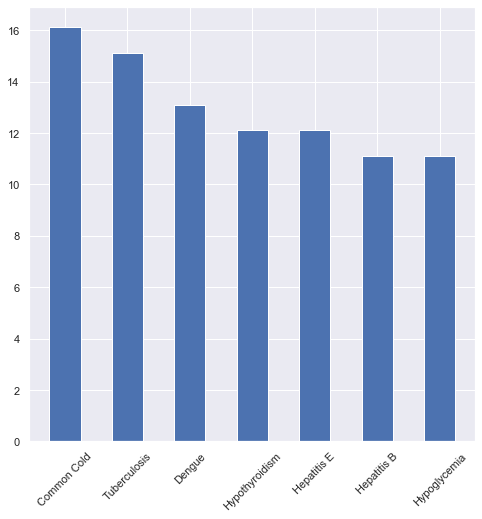

In [235]:
names_ = list(b_dict.keys())[0:7]
values_ = list(b_dict.values())[0:7]
plt.bar(range(len(list(b_dict.values())[0:7])),values_,tick_label=names_,width=0.5)
plt.xticks(rotation=45)

In [11]:
data_train['sum_symptom']=data_train['sum_symptom'].astype(float)


KeyError: 'sum_symptom'

In [56]:

cols=range(len(data_train.columns)-2)
cols
data_=data_train.iloc[:,cols]
data_


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


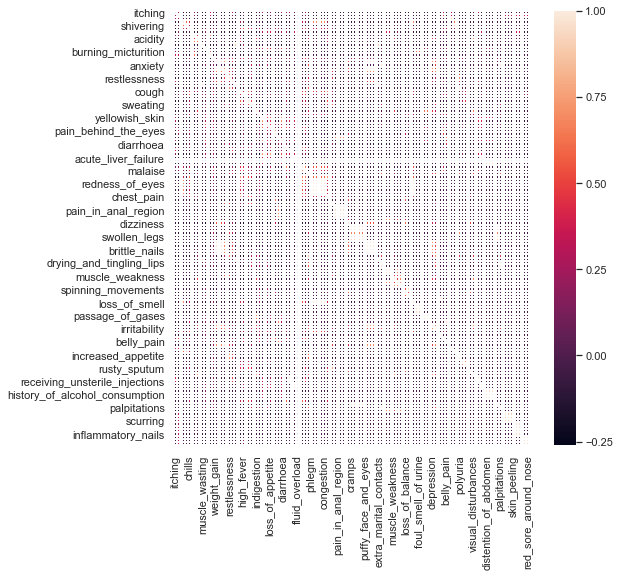

In [40]:
sns.set(rc={'figure.figsize':(8,8)})
ax = sns.heatmap(data_.corr(), annot=False,
                 linewidths=1, fmt='.2f')

In [41]:
data_.corr()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
itching,1.000000,0.318158,0.326439,-0.086906,-0.059893,-0.175905,-0.160650,0.202850,-0.086906,-0.059893,...,-0.059893,-0.059893,-0.059893,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573
skin_rash,0.318158,1.000000,0.298143,-0.094786,-0.065324,-0.029324,0.171134,0.161784,-0.094786,-0.065324,...,0.320859,0.320859,0.320859,0.331087,0.331087,0.331087,0.331087,0.331087,0.331087,0.331087
nodal_skin_eruptions,0.326439,0.298143,1.000000,-0.032566,-0.022444,-0.065917,-0.060200,-0.032566,-0.032566,-0.022444,...,-0.022444,-0.022444,-0.022444,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073
continuous_sneezing,-0.086906,-0.094786,-0.032566,1.000000,0.608981,0.446238,-0.087351,-0.047254,-0.047254,-0.032566,...,-0.032566,-0.032566,-0.032566,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480
shivering,-0.059893,-0.065324,-0.022444,0.608981,1.000000,0.295332,-0.060200,-0.032566,-0.032566,-0.022444,...,-0.022444,-0.022444,-0.022444,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073
chills,-0.175905,-0.029324,-0.065917,0.446238,0.295332,1.000000,-0.004688,-0.095646,-0.095646,-0.065917,...,-0.065917,-0.065917,-0.065917,-0.067765,-0.067765,-0.067765,-0.067765,-0.067765,-0.067765,-0.067765
joint_pain,-0.160650,0.171134,-0.060200,-0.087351,-0.060200,-0.004688,1.000000,-0.087351,-0.087351,-0.060200,...,-0.060200,-0.060200,-0.060200,0.359845,0.359845,0.359845,0.359845,-0.061889,-0.061889,-0.061889
stomach_pain,0.202850,0.161784,-0.032566,-0.047254,-0.032566,-0.095646,-0.087351,1.000000,0.433917,0.649078,...,-0.032566,-0.032566,-0.032566,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480
acidity,-0.086906,-0.094786,-0.032566,-0.047254,-0.032566,-0.095646,-0.087351,0.433917,1.000000,0.608981,...,-0.032566,-0.032566,-0.032566,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480
ulcers_on_tongue,-0.059893,-0.065324,-0.022444,-0.032566,-0.022444,-0.065917,-0.060200,0.649078,0.608981,1.000000,...,-0.022444,-0.022444,-0.022444,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073


implementing KNN

In [44]:
from sklearn.model_selection import train_test_split
cols_train=range(len(data_train.columns)-1)
cols_train
x_train = data_train.iloc[:, cols_train]
y_train = pd.DataFrame(data_train['prognosis'])
train_X, val_X, train_Y, val_Y = train_test_split(x_train, y_train, test_size=0.33, random_state=42)

In [46]:
cols_test=range(len(data_test.columns)-1)
cols_test
x_test = data_test.iloc[:, cols_test]
y_test = pd.DataFrame(data_test['prognosis'])


In [48]:
val_X.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'pus_filled_pimples', 'blackheads', 'scurring', 'skin_peeling',
       'silver_like_dusting', 'small_dents_in_nails', 'inflammatory_nails',
       'blister', 'red_sore_around_nose', 'yellow_crust_ooze'],
      dtype='object', length=132)

In [18]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaler.fit(train_X)
#train_X = scaler.transform(train_X)
#val_X = scaler.transform(val_X)

In [214]:
klen=round(math.sqrt(len(train_X)))
klen

57

In [49]:
tpredict=[]
#print(tpredict)
for i in range(1,klen):
    #Apply knn with k = i
    knn = KNeighborsClassifier(n_neighbors=i,metric="hamming",weights="distance")
    #print(knn)
    knn.fit(train_X, train_Y.values.ravel())
    ypred=pd.DataFrame(knn.predict(val_X))
    accuracy_test=accuracy_score(val_Y,ypred)
    tpredict.append(accuracy_test)
              


NameError: name 'klen' is not defined

In [216]:
error=[]
for i in tpredict:
    error.append(1-i)
print(error)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


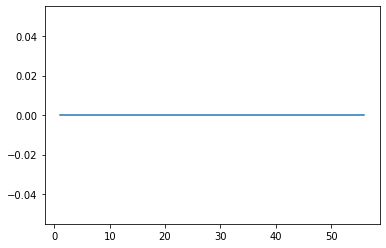

In [77]:
plt.plot(range(1,klen),error)

In [50]:
from sklearn.preprocessing import LabelEncoder
number= LabelEncoder()
train_Y['prognosis']=number.fit_transform(train_Y['prognosis'].astype('str'))
val_Y['prognosis']=number.fit_transform(val_Y['prognosis'].astype('str'))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [51]:
train_Y

,prognosis
4308,9
2269,20
3022,18
442,9
4072,32
4819,21
925,23
2266,20
4376,39
1411,37


In [52]:
from sklearn.ensemble import RandomForestRegressor 
  
 # create regressor object 
regressor = RandomForestRegressor(n_estimators = 60, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_X,train_Y.values.ravel()) 

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=60,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [53]:
y_pred_ra=regressor.predict(val_X)
y_pred_ra=y_pred_ra.astype(int)

In [54]:
y_pred_ra=pd.DataFrame(y_pred_ra)

In [55]:
y_pred_ra

,0
0,2
1,2
2,24
3,1
4,9
5,23
6,25
7,6
8,19
9,30


In [56]:
y_train['prognosis']=number.fit_transform(y_train['prognosis'].astype('str'))

In [57]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import cross_val_score

In [58]:
val_Y

,prognosis
373,2
4916,2
1550,24
3081,1
3857,9
926,23
2575,25
765,5
3751,19
4193,30


In [121]:
print("Accuracy Score:", accuracy_score(y_pred_ra, val_Y))
print('cross validation:',cross_val_score(regressor, y_pred_ra, val_Y.values.ravel(), cv=3).mean())
print("F1 Score :",f1_score(y_pred_ra,val_Y,average = "weighted"))
print('Report:\n',classification_report(val_Y, y_pred_ra))
print('Confusion Matrix: \n',confusion_matrix(val_Y, y_pred_ra))

Accuracy Score: 0.9002463054187192
cross validation: 0.9986102968030707
F1 Score : 0.9005090259378179
Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      0.83      0.91        42
           2       0.86      1.00      0.92        42
           3       1.00      0.90      0.95        40
           4       0.84      1.00      0.91        36
           5       0.97      0.74      0.84        42
           6       0.81      0.98      0.89        48
           7       1.00      0.92      0.96        37
           8       1.00      0.89      0.94        38
           9       0.79      1.00      0.89        31
          10       0.73      0.88      0.80        34
          11       0.95      0.76      0.84        46
          12       0.89      0.94      0.92        35
          13       1.00      0.92      0.96        50
          14       1.00      1.00      1.00        38
          15       0.80 

In [70]:
y_pred_test=regressor.predict(x_test)
y_pred_test=y_pred_test.astype(int)

In [71]:
y_pred_test=pd.DataFrame(y_pred_test)
y_test=y_pred_test.astype(int)

In [72]:
y_test=pd.DataFrame(y_test)


In [122]:
print("Accuracy Score:", accuracy_score(y_pred_test, y_test))
print('cross validation:',cross_val_score(regressor, y_pred_test, y_test.values.ravel(), cv=3).mean())
print("F1 Score :",f1_score(y_pred_test,y_test,average = "weighted"))
print('Report:\n',classification_report(y_test, y_pred_test))
print('Confusion Matrix: \n',confusion_matrix(y_test, y_pred_test))

Accuracy Score: 1.0
cross validation: 0.9921743208708151
F1 Score : 1.0
Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         1


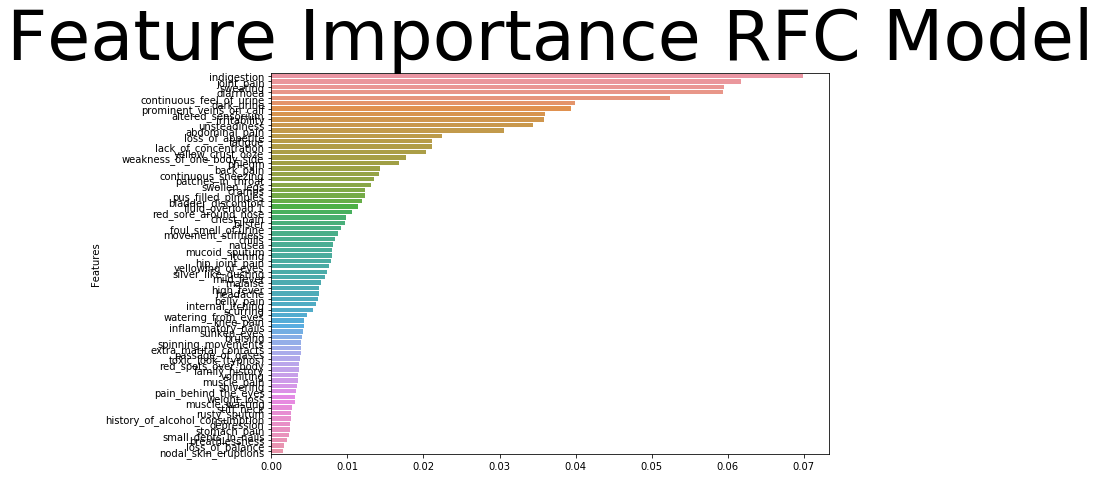

In [74]:
importance=regressor.feature_importances_
feature_importance=pd.Series(importance, index=pd.DataFrame(train_X).columns).sort_values(ascending=False)
plt.figure(figsize=(10,7))
sns.barplot(x=feature_importance[0:70], y=feature_importance.index[0:70])
plt.title('Feature Importance RFC Model',size=70)
plt.ylabel("Features")
plt.show()

In [75]:
from sklearn.feature_selection import RFE
rfe = RFE(regressor, 70)
rfe.fit(train_X,train_Y.values.ravel())

RFE(estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                    max_depth=None, max_features='auto',
                                    max_leaf_nodes=None,
                                    min_impurity_decrease=0.0,
                                    min_impurity_split=None, min_samples_leaf=1,
                                    min_samples_split=2,
                                    min_weight_fraction_leaf=0.0,
                                    n_estimators=60, n_jobs=None,
                                    oob_score=False, random_state=0, verbose=0,
                                    warm_start=False),
    n_features_to_select=70, step=1, verbose=0)

In [76]:
train_X.columns[rfe.support_]


Index(['itching', 'nodal_skin_eruptions', 'continuous_sneezing', 'shivering',
       'chills', 'joint_pain', 'stomach_pain', 'muscle_wasting', 'vomiting',
       'fatigue', 'weight_loss', 'patches_in_throat', 'high_fever',
       'sunken_eyes', 'breathlessness', 'sweating', 'indigestion', 'headache',
       'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes',
       'back_pain', 'abdominal_pain', 'diarrhoea', 'mild_fever',
       'yellowing_of_eyes', 'malaise', 'phlegm', 'chest_pain', 'bloody_stool',
       'cramps', 'bruising', 'swollen_legs', 'extra_marital_contacts',
       'knee_pain', 'hip_joint_pain', 'stiff_neck', 'movement_stiffness',
       'spinning_movements', 'loss_of_balance', 'unsteadiness',
       'weakness_of_one_body_side', 'bladder_discomfort',
       'foul_smell_of urine', 'continuous_feel_of_urine', 'passage_of_gases',
       'internal_itching', 'irritability', 'muscle_pain', 'altered_sensorium',
       'red_spots_over_body', 'belly_pain', 'watering_f

In [77]:
col = train_X.columns[rfe.support_]


In [78]:
regressor.fit(train_X[col],train_Y.values.ravel()) 
y_pred_fe=regressor.predict(val_X[col])

In [79]:
y_pred_fe_df=pd.DataFrame(y_pred_fe)

In [80]:
y_pred_fe_df=y_pred_fe_df.astype(int)

In [123]:
print("Accuracy Score:", accuracy_score(y_pred_fe_df, val_Y))
print('cross validation:',cross_val_score(regressor, y_pred_fe_df, val_Y.values.ravel(), cv=3).mean())
print("F1 Score :",f1_score(y_pred_ra,val_Y,average = "weighted"))
print('Report:\n',classification_report(val_Y, y_pred_ra))
print('Confusion Matrix: \n',confusion_matrix(val_Y, y_pred_ra))

Accuracy Score: 0.9181034482758621
cross validation: 0.9987937483108028
F1 Score : 0.9005090259378179
Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      0.83      0.91        42
           2       0.86      1.00      0.92        42
           3       1.00      0.90      0.95        40
           4       0.84      1.00      0.91        36
           5       0.97      0.74      0.84        42
           6       0.81      0.98      0.89        48
           7       1.00      0.92      0.96        37
           8       1.00      0.89      0.94        38
           9       0.79      1.00      0.89        31
          10       0.73      0.88      0.80        34
          11       0.95      0.76      0.84        46
          12       0.89      0.94      0.92        35
          13       1.00      0.92      0.96        50
          14       1.00      1.00      1.00        38
          15       0.80 

In [84]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg_mod = LogisticRegression(random_state=42, solver='lbfgs', class_weight='balanced', multi_class='multinomial').fit(train_X,train_Y.values.ravel())

In [89]:
y_pred_log_val = log_reg_mod.predict(val_X)
y_pred_log_val

array([ 2,  2, 24, ..., 21, 23,  5])

In [90]:
y_pred_log_test = log_reg_mod.predict(x_test)
y_pred_log_test

array([15,  4, 16,  9, 14, 33,  1, 12, 17,  6, 23, 30,  7, 32, 28, 29,  8,
       11, 37, 40, 19, 20, 21, 22,  3, 36, 10, 34, 13, 18, 39, 26, 24, 25,
       31,  5,  0,  2, 38, 35, 27])

In [91]:
print("Accuracy Score:", accuracy_score(y_pred_log_val, val_Y))
print("F1 Score :",f1_score(y_pred_log_val,val_Y,average = "weighted"))
print('Report:\n',classification_report(val_Y, y_pred_log_val))
print('Confusion Matrix: \n',confusion_matrix(val_Y, y_pred_log_val))

Accuracy Score: 1.0
F1 Score : 1.0
Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        42
           2       1.00      1.00      1.00        42
           3       1.00      1.00      1.00        40
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        42
           6       1.00      1.00      1.00        48
           7       1.00      1.00      1.00        37
           8       1.00      1.00      1.00        38
           9       1.00      1.00      1.00        31
          10       1.00      1.00      1.00        34
          11       1.00      1.00      1.00        46
          12       1.00      1.00      1.00        35
          13       1.00      1.00      1.00        50
          14       1.00      1.00      1.00        38
          15       1.00      1.00      1.00        33
          16       1.00      1.00    

In [94]:
print("Accuracy Score:", accuracy_score(y_pred_log_test, y_test))
print("F1 Score :",f1_score(y_pred_log_test,y_test,average = "weighted"))
print('Report:\n',classification_report(y_test, y_pred_log_test))
print('Confusion Matrix: \n',confusion_matrix(y_test, y_pred_log_test))

Accuracy Score: 1.0
F1 Score : 1.0
Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         1
          16       1.00      1.00    

Recusrive Feature Elimination for Logistic Regression

In [108]:
rfe = RFE(log_reg_mod, 40)
rfe.fit(train_X,train_Y.values.ravel())

RFE(estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='multinomial', n_jobs=None,
                                 penalty='l2', random_state=42, solver='lbfgs',
                                 tol=0.0001, verbose=0, warm_start=False),
    n_features_to_select=40, step=1, verbose=0)

In [110]:
train_X.columns[rfe.support_]
cols=train_X.columns[rfe.support_]

In [111]:
log_reg_mod.fit(train_X[cols],train_Y.values.ravel())

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='multinomial', n_jobs=None,
                   penalty='l2', random_state=42, solver='lbfgs', tol=0.0001,
                   verbose=0, warm_start=False)

In [112]:
y_pred_logreg_rfe = log_reg_mod.predict(val_X[cols])
y_pred_logreg_rfe

array([ 2,  2, 24, ..., 21, 23,  5])

In [113]:
print("Accuracy Score:", accuracy_score(y_pred_logreg_rfe, val_Y))
print("F1 Score :",f1_score(y_pred_logreg_rfe,val_Y,average = "weighted"))
print('Report:\n',classification_report(val_Y, y_pred_logreg_rfe))
print('Confusion Matrix: \n',confusion_matrix(val_Y, y_pred_logreg_rfe))

Accuracy Score: 0.9907635467980296
F1 Score : 0.9909119980941367
Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      1.00      0.95        42
           2       0.93      1.00      0.97        42
           3       0.83      1.00      0.91        40
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        42
           6       1.00      1.00      1.00        48
           7       1.00      1.00      1.00        37
           8       1.00      1.00      1.00        38
           9       1.00      1.00      1.00        31
          10       1.00      1.00      1.00        34
          11       1.00      1.00      1.00        46
          12       1.00      1.00      1.00        35
          13       1.00      0.92      0.96        50
          14       1.00      1.00      1.00        38
          15       1.00      1.00      1.00        33
       

In [116]:
y_pred_logreg_rfe_test = log_reg_mod.predict(x_test[cols])
y_pred_logreg_rfe_test

array([15,  4, 16,  9, 14, 33,  1, 12, 17,  6, 23, 30,  7, 32, 28, 29,  8,
       11, 37, 40, 19, 20, 21, 22,  3, 36, 10, 34, 13, 18, 39, 26, 24, 25,
       31,  5,  0,  2, 38, 35, 27])

In [117]:
print("Accuracy Score:", accuracy_score(y_pred_logreg_rfe_test, y_test))
print("F1 Score :",f1_score(y_pred_logreg_rfe_test,y_test,average = "weighted"))
print('Report:\n',classification_report(y_test, y_pred_logreg_rfe_test))
print('Confusion Matrix: \n',confusion_matrix(y_test, y_pred_logreg_rfe_test))

Accuracy Score: 1.0
F1 Score : 1.0
Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         1
          16       1.00      1.00    